### Define Problem
Dataset ini merupakan Dataset yang menampilkan akivitas Customer/Visitor di website Online Shop dan hubungannya dengan Transaksi yang dilakukan dalam waktu satu tahun. Banyaknya Visitor bukan berarti banyak juga transaksi yang terjadi, sebagian besar dari visitor tidak melakukan transaksi ketika mengunjungi website Online Shop. 

### Define Goals
- Membuat model Machine Learning untuk memprediksi kemungkinan Visitor/Customer untuk melakukan Transaksi berdasarkan aktivitasnya
- meningkatkan keinginan Customer untuk melakukan Transaksi

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, classification_report


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_rows', 300)

import joblib


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('online_shop.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Check Missing Value

In [4]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak ada missing value

#### Describe Data

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
BankDesc = []

for i in df.columns:
    BankDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [7]:
pd.DataFrame(data = BankDesc, columns= [
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
] )


,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,Administrative,int64,0,0.0,27,"[1, 14]"
1,Administrative_Duration,float64,0,0.0,3335,"[175.0, 59.0]"
2,Informational,int64,0,0.0,17,"[9, 6]"
3,Informational_Duration,float64,0,0.0,1258,"[15.75, 141.2]"
4,ProductRelated,int64,0,0.0,311,"[145, 207]"
5,ProductRelated_Duration,float64,0,0.0,9551,"[700.55, 1048.107143]"
6,BounceRates,float64,0,0.0,1872,"[0.0028213170000000003, 0.018604651]"
7,ExitRates,float64,0,0.0,4777,"[0.056410256, 0.032987654]"
8,PageValues,float64,0,0.0,2704,"[83.10114264, 61.9395]"
9,SpecialDay,float64,0,0.0,6,"[0.8, 0.6]"


<Figure size 1080x720 with 0 Axes>

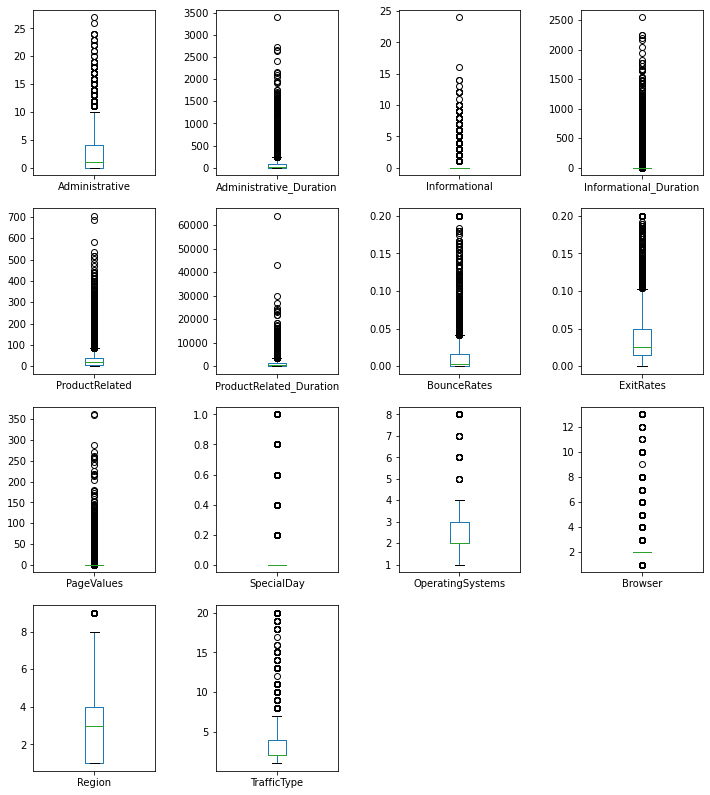

In [136]:
plt.figure(figsize=(15,10))
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);
plt.show()

Tidak dilakukan apapun terhadap Outliers karena bukan data Abnormal

### EDA

In [9]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
pd.crosstab(index=df['Revenue'], columns='Transaksi')

col_0,Transaksi
Revenue,
False,10422
True,1908


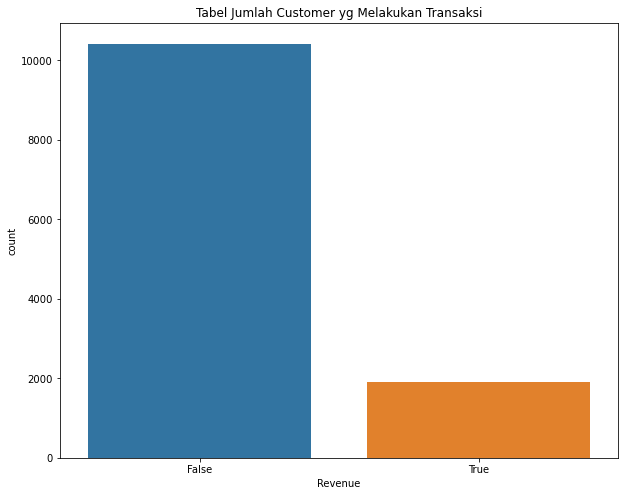

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x='Revenue' ,data=df)
plt.title("Tabel Jumlah Customer yg Melakukan Transaksi")
plt.show()

- Sebagian Besar Customer/visitor Tidak Melakukan Transaksi
- Data Imbalance

In [12]:
pd.crosstab(index=df['Month'], columns=df['Revenue'])

Revenue,False,True
Month,,
Aug,357,76
Dec,1511,216
Feb,181,3
Jul,366,66
June,259,29
Mar,1715,192
May,2999,365
Nov,2238,760
Oct,434,115


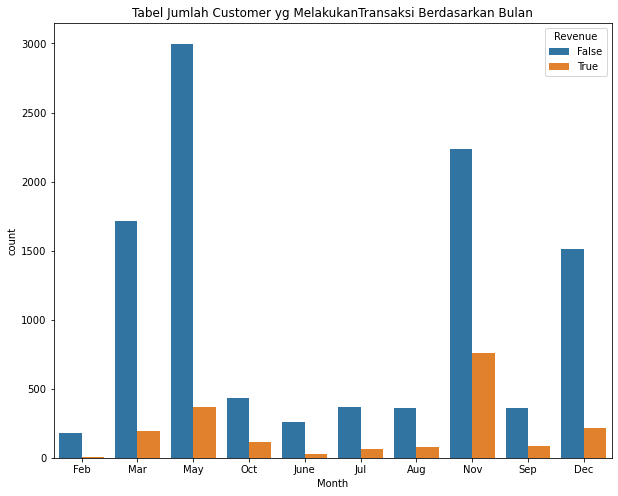

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x='Month' ,data=df, hue='Revenue')
plt.title("Tabel Jumlah Customer yg MelakukanTransaksi Berdasarkan Bulan")
plt.show()

- Jumlah Customer yang Melakukan transaksi paling banyak pada bulan November
- Jumlah Customer yang tidak melakukan transaksi terbanyak pada bulan May
- Bulan Februari paling sedikit dikunjungi oleh customer

In [14]:
pd.crosstab(index=df['Weekend'], columns='Jumlah')

col_0,Jumlah
Weekend,
False,9462
True,2868


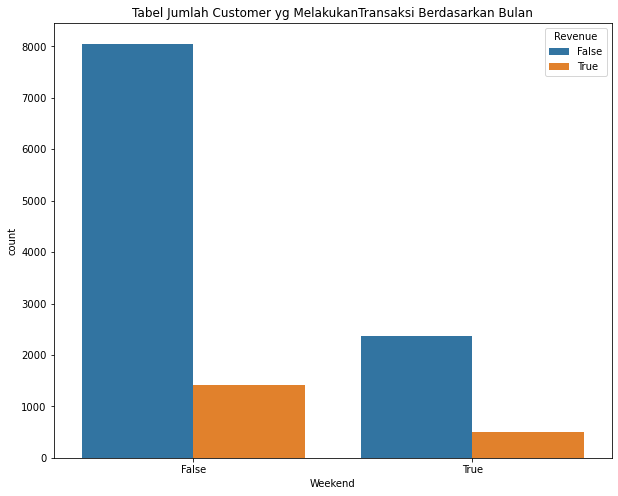

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='Weekend' ,data=df, hue='Revenue')
plt.title("Tabel Jumlah Customer yg MelakukanTransaksi Berdasarkan Bulan")
plt.show()

- Jumlah visitor dan Transaksi paling banyak dilakukan saat Weekdays, karena weekdays memiliki 5 hari

In [16]:
pd.crosstab(index=df['VisitorType'], columns='Tipe Visitor')

col_0,Tipe Visitor
VisitorType,
New_Visitor,1694
Other,85
Returning_Visitor,10551


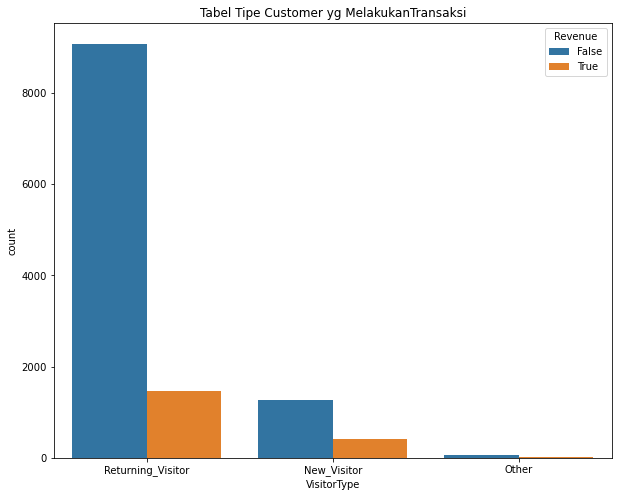

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x='VisitorType' ,data=df, hue='Revenue')
plt.title("Tabel Tipe Customer yg MelakukanTransaksi")
plt.show()

- Pengunjung Website paling banyak merupakan Customer yang pernah berkunjung sebelumnya (Returning_Visitor)
- Transaksi terbanyak dilakukan oleh Returning_Visitor, hal ini berbanding lurus karena merupakan pengunjung terbanyak

In [114]:
pd.crosstab(index=df['Region'], columns='Region')

col_0,Region
Region,
1,4780
2,1136
3,2403
4,1182
5,318
6,805
7,761
8,434
9,511


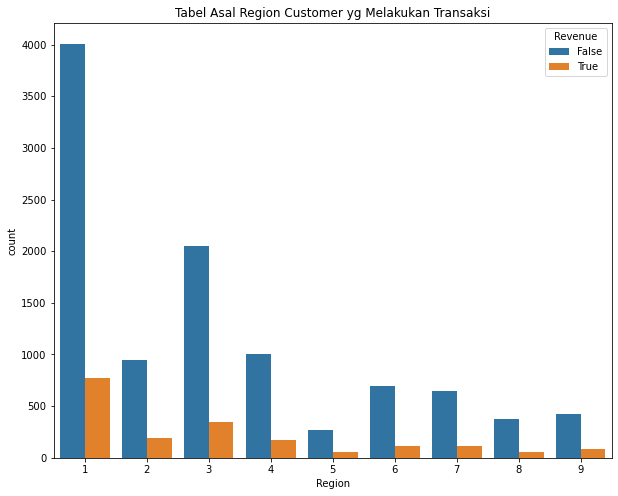

In [115]:
plt.figure(figsize=(10,8))
sns.countplot(x='Region' ,data=df, hue='Revenue')
plt.title("Tabel Asal Region Customer yg Melakukan Transaksi")
plt.show()

- Customer yang melakukan visit dan yang melakukan transaksi paling banyak berasal dari Region 1
- visitor dan transaksi paling sedikit berasal dari Region 5

In [118]:
pd.crosstab(index=df['Browser'], columns='Region')

col_0,Region
Browser,
1,2462
2,7961
3,105
4,736
5,467
6,174
7,49
8,135
9,1


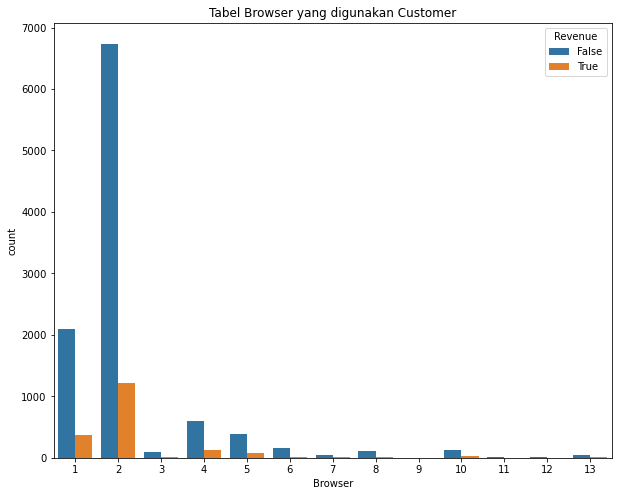

In [117]:
plt.figure(figsize=(10,8))
sns.countplot(x='Browser' ,data=df, hue='Revenue')
plt.title("Tabel Browser yang digunakan Customer")
plt.show()

- Browser yang paling banyak digunakan oleh Customer/visitor adalah Browser tipe 2

In [123]:
pd.crosstab(index=df['OperatingSystems'], columns='Region')

col_0,Region
OperatingSystems,
1,2585
2,6601
3,2555
4,478
5,6
6,19
7,7
8,79


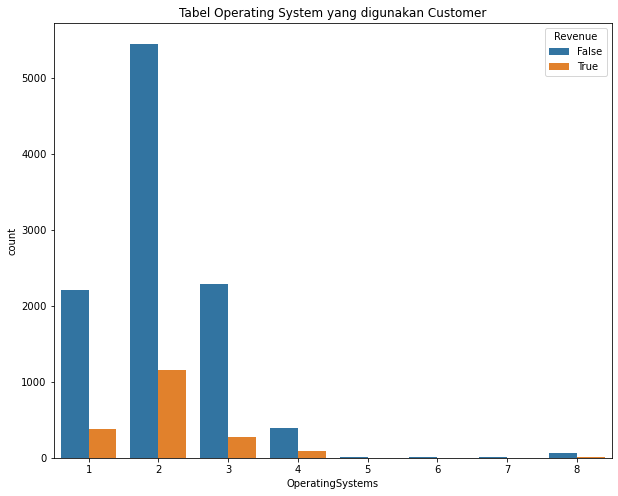

In [120]:
plt.figure(figsize=(10,8))
sns.countplot(x='OperatingSystems' ,data=df, hue='Revenue')
plt.title("Tabel Operating System yang digunakan Customer")
plt.show()

- Sistem operasi yang paling banyak digunakan oleh customer/visitor dalam mengakses web adalah sistem operasi tipe 2
- Transaksi paling banyak dilakukan oleh customer dengan sistem operasi tipe 2

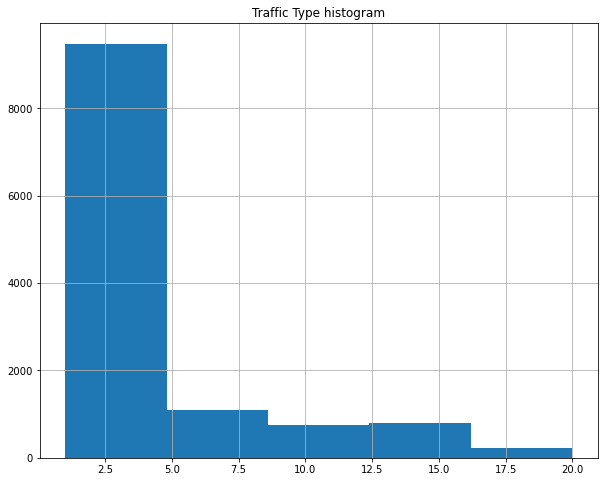

In [127]:
df['TrafficType'].hist(bins=5,figsize=(10,8))
plt.title('Traffic Type histogram')
plt.show()

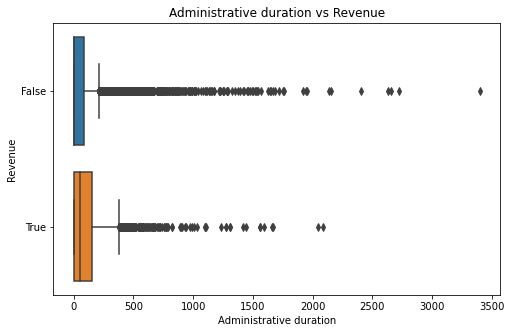

In [134]:
plt.figure(figsize=(8, 5))

sns.boxplot(df['Administrative_Duration'], df['Revenue'], orient='h')
plt.title('Sebaran data Administrative duration vs Revenue')
plt.xlabel('Administrative duration')
plt.ylabel('Revenue')
plt.show()

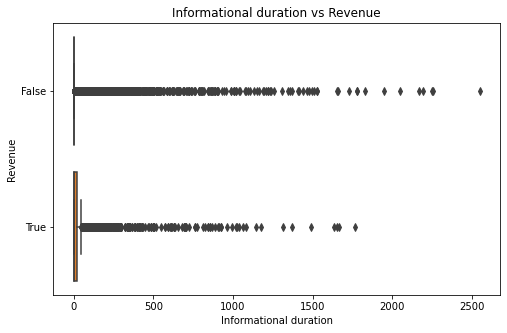

In [137]:
plt.figure(figsize=(8, 5))

sns.boxplot(df['Informational_Duration'], df['Revenue'], orient='h')
plt.title('Informational duration vs Revenue')
plt.xlabel('Informational duration')
plt.ylabel('Revenue')
plt.show()

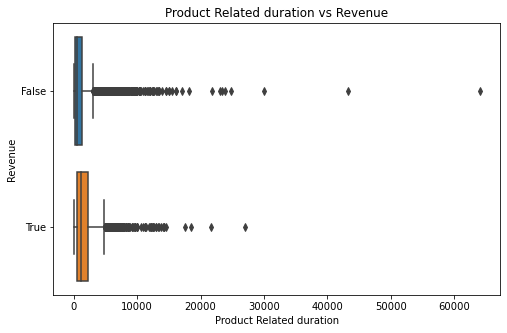

In [138]:
plt.figure(figsize=(8, 5))

sns.boxplot(df['ProductRelated_Duration'], df['Revenue'], orient='h')
plt.title('Product Related duration vs Revenue')
plt.xlabel('Product Related duration')
plt.ylabel('Revenue')
plt.show()

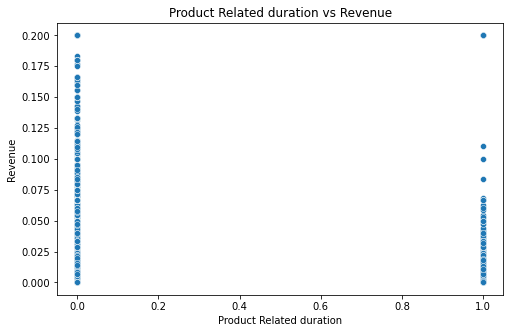

In [140]:
plt.figure(figsize=(8, 5))

sns.scatterplot(df['Revenue'], df['BounceRates'])
plt.title('Product Related duration vs Revenue')
plt.xlabel('Product Related duration')
plt.ylabel('Revenue')
plt.show()

### Data Conversion

In [18]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [19]:
### Membuat dataframe baru untuk di konversi

df_conv = df
df_conv.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [20]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [21]:
## Data conversi menggunakan One Hot Encoding karena merupakan kolom Kategorik

df_conv=pd.get_dummies(data=df_conv, columns=['VisitorType'])

In [22]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [23]:
## Data conversi menggunakan map karena data merupakan kolom kategorik yang dapat diurutkan

df_conv['Month']=df_conv['Month'].map({'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

df_conv=pd.get_dummies(data=df_conv, columns=['Weekend'])

df_conv = df_conv.rename(columns = {'Weekend_True': 'Weekends', 'Weekend_False': 'Weekdays'}, inplace = True)

df_conv['Weekend']=df_conv['Weekend'].astype(int)

df_conv['Revenue']=df_conv['Revenue'].astype(int)
df_conv.head()

In [24]:
# Data conversi menggunakan Label Encoding karena Data merupakan boolean

le = LabelEncoder()
df_conv['Revenue'] = le.fit_transform(df_conv['Revenue'])

In [25]:
df_conv['Weekend'] = le.fit_transform(df_conv['Weekend'])

In [26]:
df_conv.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,0,1


In [27]:
df_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Month                          12330 non-null  int64  
 11  OperatingSystems               12330 non-null  int64  
 12  Browser                        12330 non-null 

### Base Model

In [151]:
X = df_conv.drop(columns=['Revenue'])
Y = df_conv['Revenue']

In [152]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = .20, random_state = 42, stratify=Y)

In [153]:
RF_1=RandomForestClassifier()

RF_1.fit(X_train,Y_train)

RandomForestClassifier()

In [154]:
y_predRF1_test = RF_1.predict(X_test)
y_predRF1_train =RF_1.predict(X_train)

In [155]:
print(classification_report(Y_test, y_predRF1_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.73      0.53      0.62       382

    accuracy                           0.90      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.89      0.90      0.89      2466



In [156]:
print(classification_report(Y_train, y_predRF1_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8338
           1       1.00      1.00      1.00      1526

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



In [157]:
### Logistic Regression

In [158]:
LR_1=LogisticRegression()
LR_1.fit(X_train,Y_train)

LogisticRegression()

In [159]:
y_predLR_test = LR_1.predict(X_test)
y_predLR_train =LR_1.predict(X_train)


In [160]:
print(classification_report(Y_test, y_predLR_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2084
           1       0.68      0.35      0.47       382

    accuracy                           0.87      2466
   macro avg       0.79      0.66      0.70      2466
weighted avg       0.86      0.87      0.86      2466



In [161]:
print(classification_report(Y_train, y_predLR_train))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      8338
           1       0.73      0.38      0.50      1526

    accuracy                           0.88      9864
   macro avg       0.81      0.68      0.72      9864
weighted avg       0.87      0.88      0.87      9864



### XGBoost

In [163]:
XGB_1=XGBClassifier()

XGB_1.fit(X_train,Y_train)

[15:13:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
y_predXGB1_test = XGB_1.predict(X_test)
y_predXGB1_train =XGB_1.predict(X_train)

In [165]:
print(classification_report(Y_test, y_predXGB1_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2084
           1       0.68      0.57      0.62       382

    accuracy                           0.89      2466
   macro avg       0.80      0.76      0.78      2466
weighted avg       0.88      0.89      0.89      2466



In [166]:
print(classification_report(Y_train, y_predXGB1_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8338
           1       0.98      0.93      0.96      1526

    accuracy                           0.99      9864
   macro avg       0.99      0.96      0.97      9864
weighted avg       0.99      0.99      0.99      9864



### Handling Imbalance Data

#### SMOTE

In [31]:
### handling menggunakan SMOTE karena merupakan metode yang paling baik (bersama dengan undersampling)

x_im = df_conv.drop(columns=['Revenue'])
y_im = df_conv['Revenue']

In [141]:
x_im_train, x_im_test, y_im_train, y_im_test = train_test_split(x_im, y_im, test_size = .20, random_state = 42)

In [36]:
sm = SMOTE(random_state = 42)

In [37]:
df_conv['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [39]:
x_train_sm, y_train_sm = sm.fit_sample(x_im_train, y_im_train)

In [40]:
df_smote = pd.concat([x_train_sm, y_train_sm],axis=1)

In [41]:
df_smote['Revenue'].value_counts()

1    8338
0    8338
Name: Revenue, dtype: int64

### Train Split Dataset

In [42]:
df_smote.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,8,732.25,0,0.0,34,1345.755952,0.005128,0.013342,12.274195,0.8,5,3,3,3,2,0,0,0,1,0
1,0,0.00,0,0.0,4,157.200000,0.040000,0.100000,0.000000,0.0,10,1,8,3,1,1,0,0,1,0
2,0,0.00,0,0.0,4,42.000000,0.000000,0.050000,0.000000,0.0,12,2,10,1,2,0,0,0,1,0
3,2,338.00,0,0.0,17,1205.566667,0.012500,0.037500,19.236250,0.8,5,3,2,2,2,0,0,0,1,1
4,0,0.00,0,0.0,32,827.646212,0.000000,0.000587,54.676348,0.0,3,2,2,7,2,0,0,0,1,1


In [43]:
x = df_smote.drop(columns=['Revenue'])
y = df_smote['Revenue']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, stratify =  y, random_state = 42)

In [45]:
x_train.shape

(13340, 19)

In [46]:
x_test.shape

(3336, 19)

### Logistic Regression

In [47]:
LR = LogisticRegression()

In [48]:
LR.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_predLR_test = LR.predict(x_test)
y_predLR_train =LR.predict(x_train)

In [50]:
print(classification_report(y_test, y_predLR_test))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1668
           1       0.88      0.79      0.83      1668

    accuracy                           0.84      3336
   macro avg       0.84      0.84      0.84      3336
weighted avg       0.84      0.84      0.84      3336



In [51]:
print(classification_report(y_train, y_predLR_train))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      6670
           1       0.89      0.79      0.84      6670

    accuracy                           0.85     13340
   macro avg       0.85      0.85      0.85     13340
weighted avg       0.85      0.85      0.85     13340



Berdasarkan Recall pada Classification Report menunjukan model Linear Regression yang menggunakan Smote memiliki nilai Recall sebesar 79% Artinya model mampu memprediksi 79% Visitor/Customer yang akan melakukan Transaksi dari kelesuruhan Customer yang benar-benar melakukan Transaksi. dalam model ini nilai Recall pada saat test dan train sama.

In [52]:
cm_LR = confusion_matrix(y_train, y_predLR_train, labels=[1, 0])
df_LR_1 = pd.DataFrame(cm_LR, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_LR_1

,Pred 1,Pred 0
Akt 1,5277,1393
Akt 0,661,6009


Berdasarkan Confusion Matrix menunjukan bahwa model mampu memprediksi 5277 visitor yang melakukan transaksi atau sebesar 79% 

In [53]:
cm_LR = confusion_matrix(y_test, y_predLR_test, labels=[1, 0])
df_LR_ts= pd.DataFrame(cm_LR, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_LR_ts

,Pred 1,Pred 0
Akt 1,1316,352
Akt 0,180,1488


Berdasarkan Confusion Matrix menunjukan bahwa model mampu memprediksi 1316 visitor yang melakukan transaksi atau sebesar 79% 

In [54]:
LR_base_f1_ts= f1_score(y_test, y_predLR_test)
LR_base_Rec_ts=recall_score(y_test, y_predLR_test)
LR_base_f1_tr= f1_score(y_train, y_predLR_train)
LR_base_Rec_tr=recall_score(y_train, y_predLR_train)

In [55]:
FP_LR_base_tr= df_LR_1['Pred 1'][1]
FN_LR_base_tr = df_LR_1['Pred 0'][0]
FP_LR_base_ts= df_LR_ts['Pred 1'][1]
FN_LR_base_ts = df_LR_ts['Pred 0'][0]

### Random Forest

In [56]:
RF = RandomForestClassifier()

In [57]:
RF.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
y_predRF_test = RF.predict(x_test)
y_predRF_train =RF.predict(x_train)

In [59]:
print(classification_report(y_test, y_predRF_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1668
           1       0.92      0.95      0.94      1668

    accuracy                           0.93      3336
   macro avg       0.93      0.93      0.93      3336
weighted avg       0.93      0.93      0.93      3336



In [60]:
print(classification_report(y_train, y_predRF_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6670
           1       1.00      1.00      1.00      6670

    accuracy                           1.00     13340
   macro avg       1.00      1.00      1.00     13340
weighted avg       1.00      1.00      1.00     13340



Berdasarkan Classification Report, Model mampu menebak 95% visitor yang melakukan transaksi pada saat test dan 100% pada saat Train. angka ini terlalu bagus untuk sebuah model karena tidak ada prediksi yang benar2 100%

In [61]:
cm_RF = confusion_matrix(y_train, y_predRF_train, labels=[1, 0])
df_RF_1 = pd.DataFrame(cm_RF, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_RF_1

,Pred 1,Pred 0
Akt 1,6670,0
Akt 0,0,6670


In [62]:
cm_RF = confusion_matrix(y_test, y_predRF_test, labels=[1, 0])
df_RF_ts = pd.DataFrame(cm_RF, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_RF_ts

,Pred 1,Pred 0
Akt 1,1592,76
Akt 0,144,1524


In [63]:
RF_base_f1_ts= f1_score(y_test, y_predRF_test)
RF_base_Rec_ts=recall_score(y_test, y_predRF_test)
RF_base_f1_tr= f1_score(y_train, y_predRF_train)
RF_base_Rec_tr=recall_score(y_train, y_predRF_train)


In [64]:
FP_RF_base_tr= df_RF_1['Pred 1'][1]
FN_RF_base_tr = df_RF_1['Pred 0'][0]
FP_RF_base_ts= df_RF_ts['Pred 1'][1]
FN_RF_base_ts = df_RF_ts['Pred 0'][0]

### XGBoost

In [65]:
XGB = XGBClassifier()

XGB.fit(x_train, y_train)

[13:21:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
y_predXGB_test = XGB.predict(x_test)
y_predXGB_train =XGB.predict(x_train)

In [67]:
print(classification_report(y_test, y_predXGB_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1668
           1       0.92      0.95      0.93      1668

    accuracy                           0.93      3336
   macro avg       0.93      0.93      0.93      3336
weighted avg       0.93      0.93      0.93      3336



In [68]:
print(classification_report(y_train, y_predXGB_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6670
           1       0.99      0.99      0.99      6670

    accuracy                           0.99     13340
   macro avg       0.99      0.99      0.99     13340
weighted avg       0.99      0.99      0.99     13340



In [69]:
cm_XGB = confusion_matrix(y_train, y_predXGB_train, labels=[1, 0])
df_XGB_1 = pd.DataFrame(cm_XGB, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_XGB_1

,Pred 1,Pred 0
Akt 1,6598,72
Akt 0,58,6612


In [70]:
cm_XGB = confusion_matrix(y_test, y_predXGB_test, labels=[1, 0])
df_XGB_ts = pd.DataFrame(cm_XGB, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_XGB_ts

,Pred 1,Pred 0
Akt 1,1582,86
Akt 0,140,1528


In [71]:
XGB_base_f1_ts= f1_score(y_test, y_predXGB_test)
XGB_base_Rec_ts=recall_score(y_test, y_predXGB_test)
XGB_base_f1_tr= f1_score(y_train, y_predXGB_train)
XGB_base_Rec_tr=recall_score(y_train, y_predXGB_train)


In [72]:
FP_XGB_base_tr= df_XGB_1['Pred 1'][1]
FN_XGB_base_tr = df_XGB_1['Pred 0'][0]
FP_XGB_base_ts= df_XGB_ts['Pred 1'][1]
FN_XGB_base_ts = df_XGB_ts['Pred 0'][0]

### HyperParameter Tuning

### Random Forest

In [73]:
skf = StratifiedKFold(n_splits = 3)

In [74]:
RF_tuning = RandomForestClassifier()

In [89]:
param_RF = {"n_estimators":np.arange(800, 2000,100),
             "max_depth": np.arange(2,50,2), 
             "min_samples_split": np.arange(2,50,1),
             "min_samples_leaf":np.arange(2,50,1), 
             "class_weight":[ {0 : .15, 1 : .85}, {0 : .2, 1 : .8}, {0 : .1, 1 : .9}]}

In [90]:
GS_RF = RandomizedSearchCV(RF_tuning, param_RF, cv = skf, n_jobs=-1, verbose =1,scoring='f1',n_iter=20, random_state=42)

In [91]:
GS_RF.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'class_weight': [{0: 0.15, 1: 0.85},
                                                         {0: 0.2, 1: 0.8},
                                                         {0: 0.1, 1: 0.9}],
                                        'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9,...
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 

In [92]:
GS_RF.best_params_

{'n_estimators': 1800,
 'min_samples_split': 18,
 'min_samples_leaf': 6,
 'max_depth': 36,
 'class_weight': {0: 0.2, 1: 0.8}}

In [93]:
RF_Tuned = GS_RF.best_estimator_

In [94]:
y_pred_RF_Tuned=RF_Tuned.predict(x_test)

In [95]:
print(classification_report(y_test,y_pred_RF_Tuned))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1668
           1       0.88      0.97      0.92      1668

    accuracy                           0.92      3336
   macro avg       0.92      0.92      0.92      3336
weighted avg       0.92      0.92      0.92      3336



Berdasarkan Classification Report, Model mampu menebak 97% visitor/customer yang melakukan Transaksi dari total keseluruhan Visitor yang benar-benar melakukan Transaksi

In [96]:
cm_cw=confusion_matrix(y_test,y_pred_RF_Tuned,labels=[1,0])

df_cw_tun=pd.DataFrame(cm_cw,index=['akt1','akt0'],columns=['Pred 1','Pred 0'])
df_cw_tun

,Pred 1,Pred 0
akt1,1612,56
akt0,226,1442


In [97]:
rf_rec_cw_tun=recall_score(y_test, y_pred_RF_Tuned)
rf_F1_cw_tun=f1_score(y_test, y_pred_RF_Tuned)
FN_rf_cw_tun=df_cw_tun['Pred 0'][0]
TP_rf_cw_tun=df_cw_tun['Pred 1'][0]
FP_rf_cw_tun=df_cw_tun['Pred 1'][1]
TN_rf_cw_tun=df_cw_tun['Pred 0'][1]

In [98]:
### XGBoost

In [99]:
param_xgb = {'max_depth': [None, 2, 4, 6, 8, 10],
             'learning_rate': [0.001, 0.01, 0.1, 1], 
             'n_estimators': [100, 500, 1000], 
             'gamma': [0.001, 0.01, 0.1, 1]}

In [101]:
xgb_tuned = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=param_xgb, cv = skf, n_jobs = -1 , n_iter=20, verbose = 1,random_state=42)
xgb_tuned.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[13:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=No...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=Non

In [102]:
xgb_tuned.best_params_

{'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.001}

In [103]:
xgb_tuned_sm=xgb_tuned.best_estimator_

In [104]:
y_pred_XGB_Tuned_sm=xgb_tuned_sm.predict(x_test)

In [106]:
print(classification_report(y_test,y_pred_XGB_Tuned_sm))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1668
           1       0.93      0.94      0.94      1668

    accuracy                           0.93      3336
   macro avg       0.93      0.93      0.93      3336
weighted avg       0.93      0.93      0.93      3336



Berdasarkan Classification Report, Model mampu menebak 94% visitor/customer yang melakukan Transaksi dari total keseluruhan Visitor yang benar-benar melakukan Transaksi

In [108]:
cm_cw=confusion_matrix(y_test,y_pred_XGB_Tuned_sm,labels=[1,0])

tune_sm=pd.DataFrame(cm_cw,index=['akt1','akt0'],columns=['Pred 1','Pred 0'])
tune_sm

,Pred 1,Pred 0
akt1,1574,94
akt0,124,1544


In [111]:
xgb_rec_tun_sm=recall_score(y_test, y_pred_XGB_Tuned_sm)
xgb_F1_tun_sm=f1_score(y_test, y_pred_XGB_Tuned_sm)
FN_xgb_tun=tune_sm['Pred 0'][0]
TP_xgb_tun=tune_sm['Pred 1'][0]
FP_xgb_tun=tune_sm['Pred 1'][1]
TN_xgb_tun=tune_sm['Pred 0'][1]

### Conclusion

Berdasarkan beberapa Model yang Telah Dibuat, Model Terbaik yang dipilih yaitu Model Random Forest Classifier yang telah dilakukan Random Search dengan nilai Recall sebesar 97%

### Recommendation
- Model ini disarankan untuk dijalankan pada kondisi Real Time dengan melakukan prediksi terhadap visitor/customer yang baru/sedang menjelajahi website Online Shop

- Pada Customer yang diprediksi akan melakukan Transaksi berdasarkan data aktivitas sebelumnya dapat diberikan Rekomendasi Barang sejenis dengan Rating yang terbaik berdasarkan Barang yang sedang dicari/dilihat

- Pada Customer yang diprediksi tidak melakukan Transaksi dapat diberikan Rekomendasi barang yang pernah dicari sebelumnya (untuk Visitor dengan tipe Returning_Visitor) untuk mendorong customer dalam melakukan Transaksi

### Export Model

In [150]:
joblib.dump(RF_Tuned, 'ModelCustPred')

['ModelCustPred']